### Caso elegido: Reseñas de peliculas
Varias empresas utilizan modelos entrenados con reseñas de usuarios para cosas como:
* Clasificar automaticamente las opiniones de los usuarios en positivas o negativas
* Recomendar peliculas basadas en reseñas anteriores
* Detectar reseñas falsas o con intenciones maliciosas

### Importar dependencias

In [1]:
import pandas as pd

### Importar y crear el DF

In [3]:
df = pd.read_csv("IMDB_Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Convertir a numerico la columna "sentiment"

In [4]:
df["Label"] = df["sentiment"].map({"negative":0, "positive":1})
df.head()

,review,sentiment,Label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


### Convertir "review" en vectores

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

In [16]:
x = vectorizer.fit_transform(df["review"])
y= df["Label"]

### Crear el modelo de Regresion Logistica(Clasificacion binaria)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)

### Entrenar el modelo

In [17]:
model.fit(x,y)

LogisticRegression(max_iter=5000)

### Prediccion
* Ejemplo usado para el positivo: "I absolutely loved this movie. The story was touching and the performances were outstanding. A must-watch!"
* Ejemplo usado para el negativo: "This film was a complete waste of time. Terrible acting, predictable plot, and awful dialogue."

In [39]:
resenia = """I absolutely loved this movie. The story was touching and the performances were outstanding. A must-watch!"""

resenia_vectorizado = vectorizer.transform([resenia])
print(resenia_vectorizado)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (1, 5000)>
  Coords	Values
  (0, 82)	0.36676225869319423
  (0, 2708)	0.37531525867696336
  (0, 2963)	0.14068401331147634
  (0, 3168)	0.49101091297922
  (0, 3250)	0.35524713429587695
  (0, 4254)	0.20862310631399378
  (0, 4557)	0.4872837666666589
  (0, 4843)	0.2378457436365428


In [40]:
resultado = model.predict(resenia_vectorizado)

if resultado == 0:
    print("La reseña fue negativa")
else:
    print("La reseña fue positiva")

La reseña fue positiva


### Probabilidad

In [41]:
resultado = model.predict_proba(resenia_vectorizado)
print(resultado)

[[0.00405602 0.99594398]]


### Guardo el modelo con joblib

In [28]:
import joblib

joblib.dump(model,"resenias.pkl")

['resenias.pkl']

In [32]:
resenia_pkl = joblib.load("resenias.pkl")
resenia_pkl.predict(resenia_vectorizado)

array([1])

### Grafico

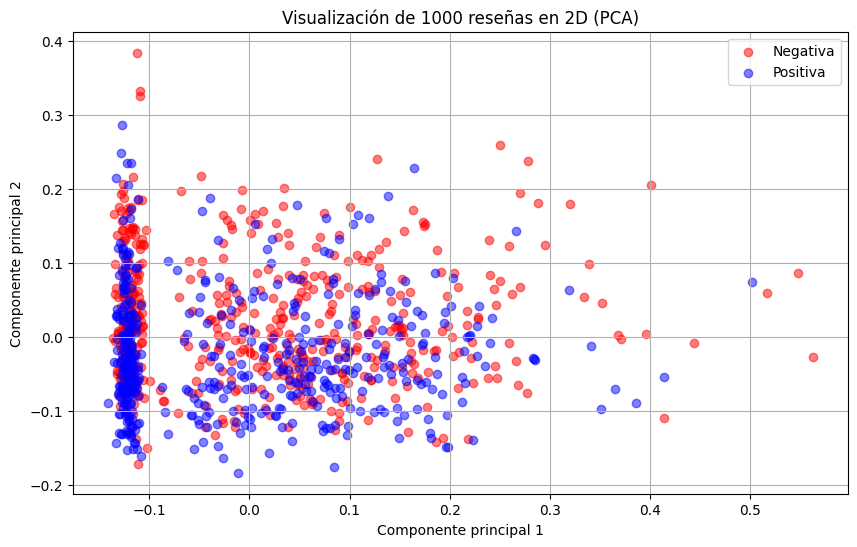

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

sample_df = df.sample(n=1000, random_state=42)
x_sample = vectorizer.transform(sample_df["review"])
y_sample = sample_df["Label"]

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_sample.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(x_pca[y_sample == 0][:, 0], x_pca[y_sample == 0][:, 1], c='red', label='Negativa', alpha=0.5)
plt.scatter(x_pca[y_sample == 1][:, 0], x_pca[y_sample == 1][:, 1], c='blue', label='Positiva', alpha=0.5)
plt.title("Visualización de 1000 reseñas en 2D (PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()
